In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime
from datetime import timedelta
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
from arch import arch_model
from statsmodels.tsa.stattools import adfuller

In [2]:
df=pd.read_csv(r"C:\Users\Bogdan\OneDrive - University of Warwick\Desktop\Projects\Short-Term WTI Price Forecasting\Temp prediction\Data.csv")
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')
df['Texas'] = pd.to_numeric(df['Texas'])
df = df.sort_values(by='DATE', ascending=True)
df = df.set_index('DATE')
df = df.drop(columns=['Dubai','UK','Dubai Price','WTI', 'Brent'])
df = df.asfreq(pd.infer_freq(df.index))
df = df.resample('W').mean()
df = df.dropna()
df

,Texas
DATE,
2020-07-12,26.875
2020-07-19,28.960
2020-07-26,26.940
2020-08-02,27.340
2020-08-09,29.400
...,...
2024-08-11,27.650
2024-08-18,29.500
2024-08-25,30.100


In [3]:
integrated_order=(0,0,0)
seasonal_order = (1,1,1,52)
future_dates = pd.date_range(start=df.index[-1] + timedelta(weeks=1), periods=6, freq='W')
rolling_predictions=pd.Series(index=future_dates)

for i in range(6):
    model = SARIMAX(df, order=integrated_order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    prediction = model_fit.forecast(1)
    next_index = df.index[-1] + timedelta(weeks=1)
    rolling_predictions.loc[next_index] = prediction.item()
    df.loc[next_index] = prediction  # this is adding the pred observation to the train data so as to consider it for the next prediction

rolling_predictions

c:\Users\Bogdan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Bogdan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Bogdan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Bogdan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Bog

2024-09-15    24.173870
2024-09-22    26.804093
2024-09-29    24.774267
2024-10-06    20.812450
2024-10-13    20.181995
2024-10-20    18.447748
Freq: W-SUN, dtype: float64

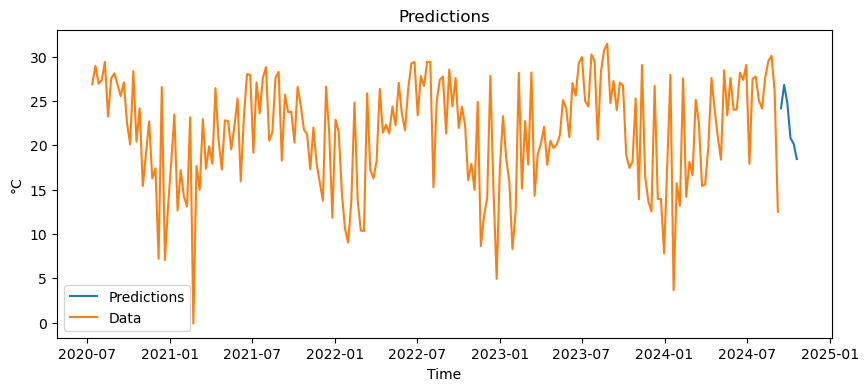

In [4]:
plt.figure(figsize=(10,4))
plt.plot(rolling_predictions, label='Predictions')
plt.plot(df, label='Data')
plt.title('Predictions')
plt.xlabel('Time')
plt.ylabel('°C')
plt.legend()